# rain SNR distrubtion

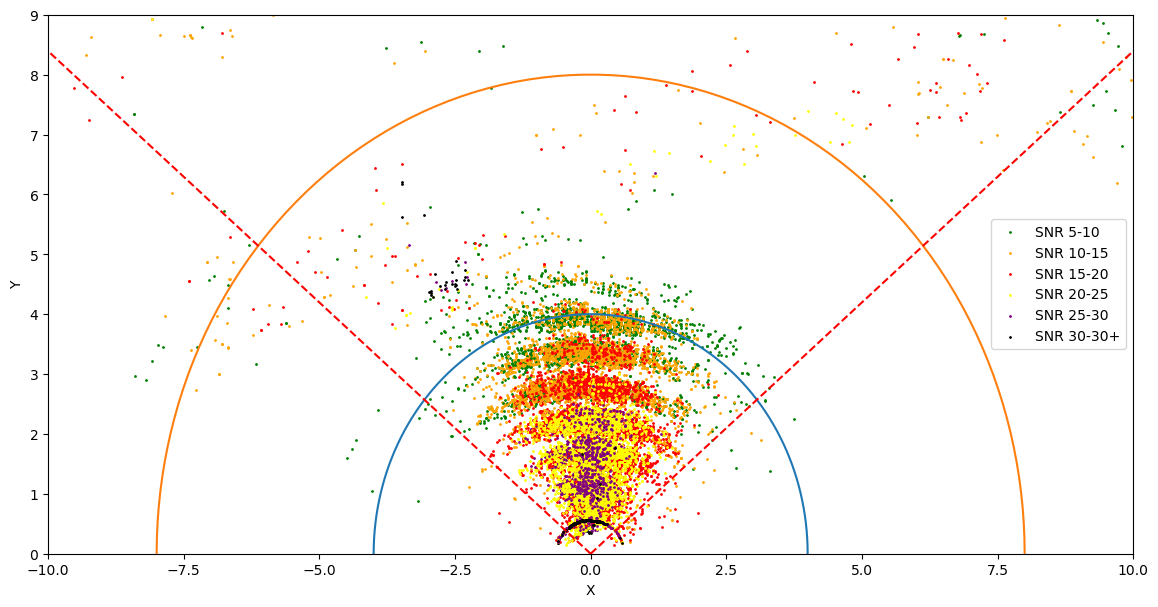

R = 2 m, angle = 50(±2)  MIN SNR: 10.59  MAX SNR: 18.00  AVG SNR: 15.62
R = 3 m, angle = 50(±2)  MIN SNR: nan  MAX SNR: nan  AVG SNR: nan
R = 4 m, angle = 50(±2)  MIN SNR: 12.50  MAX SNR: 16.30  AVG SNR: 13.63
R = 5 m, angle = 50(±2)  MIN SNR: 11.30  MAX SNR: 16.59  AVG SNR: 14.62
R = 6 m, angle = 50(±2)  MIN SNR: 13.20  MAX SNR: 13.20  AVG SNR: 13.20
R = 7 m, angle = 50(±2)  MIN SNR: 15.70  MAX SNR: 15.70  AVG SNR: 15.70
R = 2 m, angle = 50(±2)  MIN SNR: 10.80  MAX SNR: 31.00  AVG SNR: 21.00
R = 3 m, angle = 50(±2)  MIN SNR: 10.09  MAX SNR: 26.00  AVG SNR: 14.12
R = 4 m, angle = 50(±2)  MIN SNR: 10.09  MAX SNR: 17.59  AVG SNR: 12.62
R = 5 m, angle = 50(±2)  MIN SNR: 10.09  MAX SNR: 14.30  AVG SNR: 11.20
R = 6 m, angle = 50(±2)  MIN SNR: 11.70  MAX SNR: 20.50  AVG SNR: 15.62
R = 7 m, angle = 50(±2)  MIN SNR: 12.50  MAX SNR: 18.91  AVG SNR: 15.26


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

import warnings
warnings.filterwarnings('ignore')

# path = "D:/u10962/新增資料夾 (4)/CYCLIC/20241204_S6Qi 50度來回/*.xlsx"
# path = "D:/u10962/新增資料夾 (4)/CYCLIC/20241205_S6Qi_TK1_50度來回 FOV/50度來回/*.xlsx"
# path = "D:/u10962/新增資料夾 (4)/CYCLIC/20241120_S6Qi Tree test/tree/都會公園/*.xlsx"
path = "D:/u10962/新增資料夾 (4)/CYCLIC/20241206_S6Qi_Misra_FOV for 1.0324112002/Rain/UART/*.xlsx"
file_paths = glob.glob(path)

conditions = [
    ((0, 5), 'blue'),
    ((5, 10), 'green'),
    ((10, 15), 'orange'),
    ((15, 20), 'red'),
    ((20, 25), 'yellow'),
    ((25, 30), 'purple'),
    ((30, float('inf')), 'black')
]

labels_added = {color: False for _, color in conditions}
all_data = []

angle = 40
R1 = 4
R2 = 8

Rmax = 45
Amax = 0.1
angles = np.linspace((180/angle-1)*np.pi/(180/angle), np.pi/(180/angle), 100)  # 135 to 45 degrees
A3 = np.linspace((180/Amax-1)*np.pi/(180/Amax), np.pi/(180/Amax), 100)

x1 = R1 * np.cos(A3)
y1 = R1 * np.sin(A3)
x2 = R2 * np.cos(A3)
y2 = R2 * np.sin(A3)
x3 = Rmax * np.cos(angles)
y3 = Rmax * np.sin(angles)

fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(x1, y1)
ax.plot(x2, y2)

ax.plot([0, x3[0]], [0, y3[0]], 'r--')  
ax.plot([0, x3[-1]], [0, y3[-1]], 'r--') 


for file_path in file_paths:
    df = pd.read_excel(file_path, sheet_name='CloudPoint')
    
    df_filtered = df[df['@_Range'] < 15]
    radians = np.abs(np.arctan(df_filtered['@_Y'] / df_filtered['@_X']))
    df_filtered['angle'] = np.sign(df_filtered['@_X']) * (90 - radians * (180.0 / np.pi))
    df_filtered['R'] =  np.sqrt(df_filtered['@_X']**2 + df_filtered['@_Y']**2)
    all_data.append(df_filtered)
    
    for (snr_min, snr_max), color in conditions:
        condition = (df_filtered['@_SNR'] >= snr_min) & (df_filtered['@_SNR'] < snr_max)
        x_values = df_filtered[condition]['@_X']
        y_values = df_filtered[condition]['@_Y']
        
      
        label = f'SNR {snr_min}-{snr_max if snr_max != float("inf") else "30+"}'
        if not labels_added[color] and len(x_values) > 0:
            ax.scatter(x_values, y_values, color=color, label=label, s = 1)
            labels_added[color] = True
        else:
            ax.scatter(x_values, y_values, color=color, s = 1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.xlim((-10,10))
plt.ylim((0,9))

ax.legend(loc="best")
plt.show()


all_data_df = pd.concat(all_data, ignore_index=True)
for i in range(2, 8):    
    filtered_data = all_data_df[(all_data_df['@_Y'] >= (i - 0.5)) & (all_data_df['@_Y'] <= (i + 0.5)) & (all_data_df['angle'] >= (-55)) & (all_data_df['angle'] <= (-45))& (all_data_df['@_SNR'] > 10)]
    avg_snr = filtered_data['@_SNR'].mean()
    min_snr = filtered_data['@_SNR'].min()
    max_snr = filtered_data['@_SNR'].max()
    print(f"R = {i} m, angle = 50(±2)  MIN SNR: {min_snr:.2f}  MAX SNR: {max_snr:.2f}  AVG SNR: {avg_snr:.2f}")

print("===============================")
for i in range(2, 8):    
    filtered_data = all_data_df[(all_data_df['@_Y'] >= (i - 0.5)) & (all_data_df['@_Y'] <= (i + 0.5)) & (all_data_df['angle'] >= (-5)) & (all_data_df['angle'] <= (5))& (all_data_df['@_SNR'] > 10)]
    avg_snr = filtered_data['@_SNR'].mean()
    min_snr = filtered_data['@_SNR'].min()
    max_snr = filtered_data['@_SNR'].max()
    print(f"R = {i} m, angle = 50(±2)  MIN SNR: {min_snr:.2f}  MAX SNR: {max_snr:.2f}  AVG SNR: {avg_snr:.2f}")
    


# human walks 50 degree disrtubtion

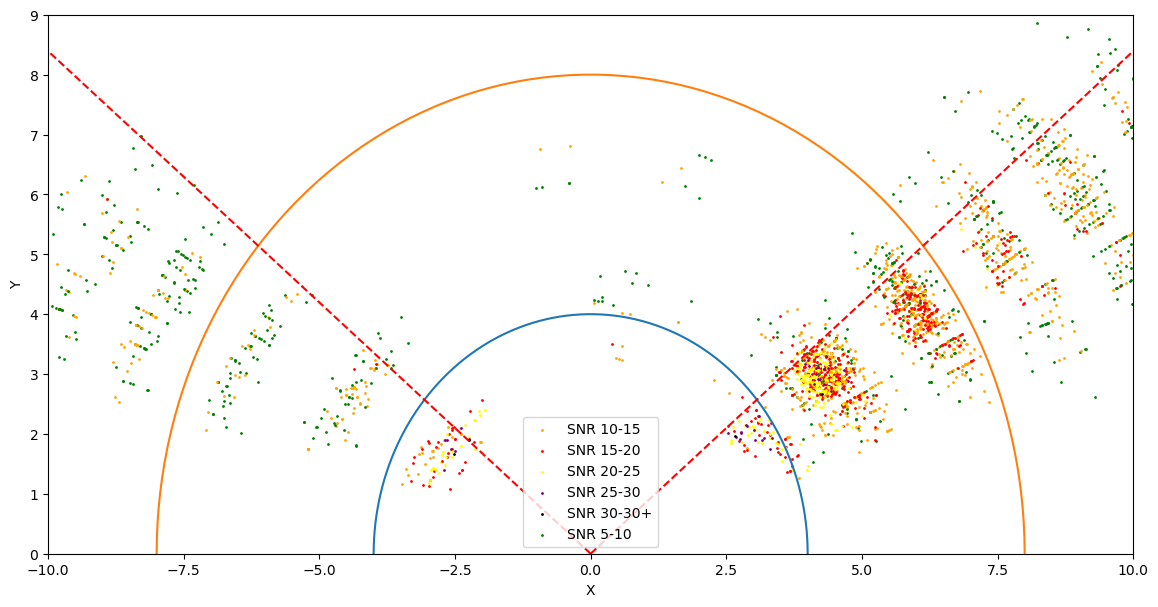

R = 2 m, angle = 50(±2)  MIN SNR: 8.00  MAX SNR: 31.00  AVG SNR: 15.96  med SNR: 15.00  q75 snr: 21.00
R = 3 m, angle = 50(±2)  MIN SNR: 7.00  MAX SNR: 30.00  AVG SNR: 14.92  med SNR: 14.00  q75 snr: 19.00
R = 4 m, angle = 50(±2)  MIN SNR: 7.00  MAX SNR: 24.00  AVG SNR: 12.08  med SNR: 12.00  q75 snr: 15.00
R = 5 m, angle = 50(±2)  MIN SNR: 7.00  MAX SNR: 23.00  AVG SNR: 10.84  med SNR: 10.00  q75 snr: 12.00
R = 6 m, angle = 50(±2)  MIN SNR: 7.00  MAX SNR: 18.00  AVG SNR: 10.52  med SNR: 10.00  q75 snr: 12.00
R = 7 m, angle = 50(±2)  MIN SNR: 7.00  MAX SNR: 18.00  AVG SNR: 9.83  med SNR: 9.00  q75 snr: 11.00


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

import warnings
warnings.filterwarnings('ignore')

path = "D:/u10962/新增資料夾 (4)/CYCLIC/20241204_S6Qi 50度來回/*.xlsx"
# path = "D:/u10962/新增資料夾 (4)/CYCLIC/20241205_S6Qi_TK1_50度來回 FOV/50度來回/*.xlsx"
# path = "D:/u10962/新增資料夾 (4)/CYCLIC/20241120_S6Qi Tree test/tree/都會公園/*.xlsx"
file_paths = glob.glob(path)

conditions = [
    ((0, 5), 'blue'),
    ((5, 10), 'green'),
    ((10, 15), 'orange'),
    ((15, 20), 'red'),
    ((20, 25), 'yellow'),
    ((25, 30), 'purple'),
    ((30, float('inf')), 'black')
]

labels_added = {color: False for _, color in conditions}
all_data = []

angle = 40
R1 = 4
R2 = 8

Rmax = 45
Amax = 0.1
angles = np.linspace((180/angle-1)*np.pi/(180/angle), np.pi/(180/angle), 100)  # 135 to 45 degrees
A3 = np.linspace((180/Amax-1)*np.pi/(180/Amax), np.pi/(180/Amax), 100)

x1 = R1 * np.cos(A3)
y1 = R1 * np.sin(A3)
x2 = R2 * np.cos(A3)
y2 = R2 * np.sin(A3)
x3 = Rmax * np.cos(angles)
y3 = Rmax * np.sin(angles)

fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(x1, y1)
ax.plot(x2, y2)

ax.plot([0, x3[0]], [0, y3[0]], 'r--')  
ax.plot([0, x3[-1]], [0, y3[-1]], 'r--') 


for file_path in file_paths:
    df = pd.read_excel(file_path, sheet_name='CloudPoint')
    
    df_filtered = df[df['@_Range'] < 15]
    df_filtered = df[df['@_tID'] < 15]
    radians = np.abs(np.arctan(df_filtered['@_Y'] / df_filtered['@_X']))
    df_filtered['angle'] = np.sign(df_filtered['@_X']) * (90 - radians * (180.0 / np.pi))
    df_filtered['R'] =  np.sqrt(df_filtered['@_X']**2 + df_filtered['@_Y']**2)
    all_data.append(df_filtered)
    
    for (snr_min, snr_max), color in conditions:
        condition = (df_filtered['@_SNR'] >= snr_min) & (df_filtered['@_SNR'] < snr_max)
        x_values = df_filtered[condition]['@_X']
        y_values = df_filtered[condition]['@_Y']
        
      
        label = f'SNR {snr_min}-{snr_max if snr_max != float("inf") else "30+"}'
        if not labels_added[color] and len(x_values) > 0:
            ax.scatter(x_values, y_values, color=color, label=label, s = 1)
            labels_added[color] = True
        else:
            ax.scatter(x_values, y_values, color=color, s = 1)

ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.xlim((-10,10))
plt.ylim((0,9))

ax.legend(loc="best")
plt.show()


all_data_df = pd.concat(all_data, ignore_index=True)
for i in range(2, 8):    
    # filtered_data = all_data_df[(all_data_df['@_Y'] >= (i - 0.5)) & (all_data_df['@_Y'] <= (i + 0.5)) & (all_data_df['angle'] >= (-55)) & (all_data_df['angle'] <= (-45))& (all_data_df['@_SNR'] > 10)]
    filtered_data = all_data_df[(all_data_df['@_Y'] >= (i - 0.5)) & (all_data_df['@_Y'] <= (i + 0.5))]
    avg_snr = filtered_data['@_SNR'].mean()
    min_snr = filtered_data['@_SNR'].min()
    max_snr = filtered_data['@_SNR'].max()
    med_snr = filtered_data['@_SNR'].median()
    q75_snr = filtered_data['@_SNR'].quantile(0.75)
    print(f"R = {i} m, angle = 50(±2)  MIN SNR: {min_snr:.2f}  MAX SNR: {max_snr:.2f}  AVG SNR: {avg_snr:.2f}  med SNR: {med_snr:.2f}  q75 snr: {q75_snr:.2f}")

  


## human walks through and we know straight and side

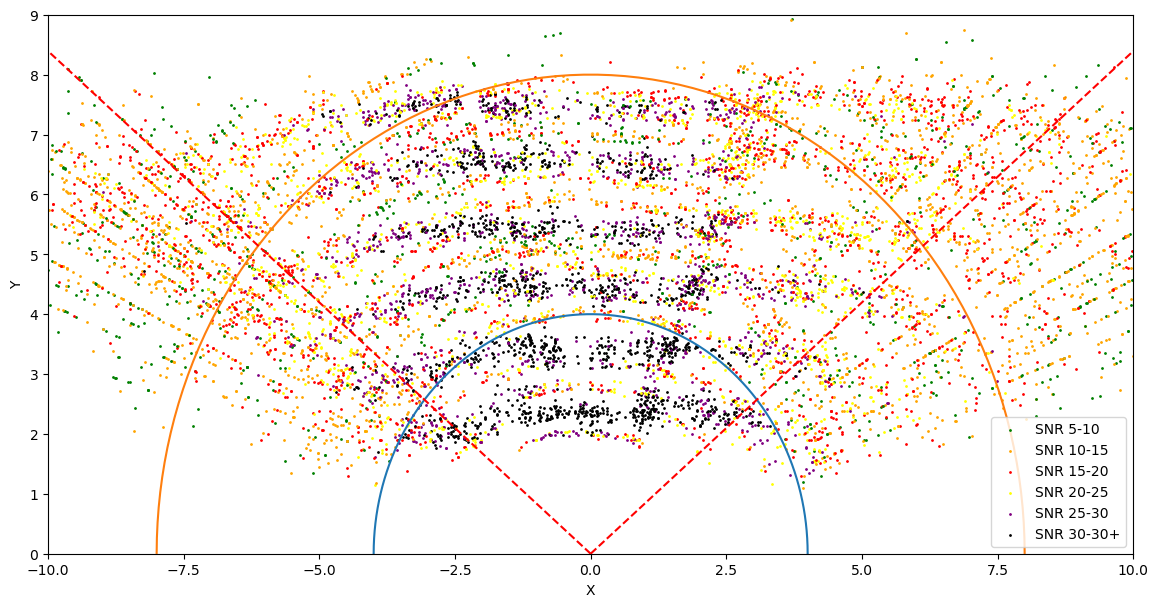

R = 2 m, angle = 50(±2)  MIN SNR: 7.00  MAX SNR: 54.00  AVG SNR: 25.23
R = 3 m, angle = 50(±2)  MIN SNR: 7.00  MAX SNR: 47.00  AVG SNR: 21.68
R = 4 m, angle = 50(±2)  MIN SNR: 7.00  MAX SNR: 50.00  AVG SNR: 19.40
R = 5 m, angle = 50(±2)  MIN SNR: 7.00  MAX SNR: 44.00  AVG SNR: 18.22
R = 6 m, angle = 50(±2)  MIN SNR: 7.00  MAX SNR: 39.00  AVG SNR: 17.43
R = 7 m, angle = 50(±2)  MIN SNR: 7.00  MAX SNR: 44.00  AVG SNR: 18.48
R = 2 m, angle = 50(±2)  MIN SNR: 17.00  MAX SNR: 54.00  AVG SNR: 35.86
R = 3 m, angle = 50(±2)  MIN SNR: 14.00  MAX SNR: 44.00  AVG SNR: 31.49
R = 4 m, angle = 50(±2)  MIN SNR: 11.00  MAX SNR: 44.00  AVG SNR: 27.89
R = 5 m, angle = 50(±2)  MIN SNR: 11.00  MAX SNR: 44.00  AVG SNR: 24.73
R = 6 m, angle = 50(±2)  MIN SNR: 11.00  MAX SNR: 36.00  AVG SNR: 20.86
R = 7 m, angle = 50(±2)  MIN SNR: 11.00  MAX SNR: 36.00  AVG SNR: 25.07


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

import warnings
warnings.filterwarnings('ignore')

path = "D:/u10962/新增資料夾 (4)/CYCLIC/20241205_S6Qi_TK1_50度來回 FOV/FOV/*.xlsx"
# path = "D:/u10962/新增資料夾 (4)/CYCLIC/20241205_S6Qi_TK1_50度來回 FOV/50度來回/*.xlsx"
# path = "D:/u10962/新增資料夾 (4)/CYCLIC/20241120_S6Qi Tree test/tree/都會公園/*.xlsx"
file_paths = glob.glob(path)

conditions = [
    ((0, 5), 'blue'),
    ((5, 10), 'green'),
    ((10, 15), 'orange'),
    ((15, 20), 'red'),
    ((20, 25), 'yellow'),
    ((25, 30), 'purple'),
    ((30, float('inf')), 'black')
]

labels_added = {color: False for _, color in conditions}
all_data = []

angle = 40
R1 = 4
R2 = 8

Rmax = 45
Amax = 0.1
angles = np.linspace((180/angle-1)*np.pi/(180/angle), np.pi/(180/angle), 100)  # 135 to 45 degrees
A3 = np.linspace((180/Amax-1)*np.pi/(180/Amax), np.pi/(180/Amax), 100)

x1 = R1 * np.cos(A3)
y1 = R1 * np.sin(A3)
x2 = R2 * np.cos(A3)
y2 = R2 * np.sin(A3)
x3 = Rmax * np.cos(angles)
y3 = Rmax * np.sin(angles)

fig, ax = plt.subplots(figsize=(14, 7))

ax.plot(x1, y1)
ax.plot(x2, y2)

ax.plot([0, x3[0]], [0, y3[0]], 'r--')  
ax.plot([0, x3[-1]], [0, y3[-1]], 'r--') 


for file_path in file_paths:
    try:
        df = pd.read_excel(file_path, sheet_name='CloudPoint', engine="openpyxl")

        df_filtered = df[df['@_Range'] < 15]
        df_filtered = df[df['@_tID'] < 15]
        radians = np.abs(np.arctan(df_filtered['@_Y'] / df_filtered['@_X']))
        df_filtered['angle'] = np.sign(df_filtered['@_X']) * (90 - radians * (180.0 / np.pi))
        df_filtered['R'] =  np.sqrt(df_filtered['@_X']**2 + df_filtered['@_Y']**2)
        all_data.append(df_filtered)

        for (snr_min, snr_max), color in conditions:
            condition = (df_filtered['@_SNR'] >= snr_min) & (df_filtered['@_SNR'] < snr_max)
            x_values = df_filtered[condition]['@_X']
            y_values = df_filtered[condition]['@_Y']


            label = f'SNR {snr_min}-{snr_max if snr_max != float("inf") else "30+"}'
            if not labels_added[color] and len(x_values) > 0:
                ax.scatter(x_values, y_values, color=color, label=label, s = 1)
                labels_added[color] = True
            else:
                ax.scatter(x_values, y_values, color=color, s = 1)
    except:
        pass

ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.xlim((-10,10))
plt.ylim((0,9))

ax.legend(loc="best")
plt.show()


all_data_df = pd.concat(all_data, ignore_index=True)
for i in range(2, 8):    
    # filtered_data = all_data_df[(all_data_df['@_Y'] >= (i - 0.5)) & (all_data_df['@_Y'] <= (i + 0.5)) & (all_data_df['angle'] >= (-55)) & (all_data_df['angle'] <= (-45))& (all_data_df['@_SNR'] > 10)]
    filtered_data = all_data_df[(all_data_df['@_Y'] >= (i - 0.5)) & (all_data_df['@_Y'] <= (i + 0.5))]
    avg_snr = filtered_data['@_SNR'].mean()
    min_snr = filtered_data['@_SNR'].min()
    max_snr = filtered_data['@_SNR'].max()
    print(f"R = {i} m, angle = 50(±2)  MIN SNR: {min_snr:.2f}  MAX SNR: {max_snr:.2f}  AVG SNR: {avg_snr:.2f}")

print("===============================")
for i in range(2, 8):    
    filtered_data = all_data_df[(all_data_df['@_Y'] >= (i - 0.5)) & (all_data_df['@_Y'] <= (i + 0.5)) & (all_data_df['angle'] >= (-5)) & (all_data_df['angle'] <= (5))& (all_data_df['@_SNR'] > 10)]
    # filtered_data = all_data_df[(all_data_df['@_Y'] >= (i - 0.5)) & (all_data_df['@_Y'] <= (i + 0.5))]
    avg_snr = filtered_data['@_SNR'].mean()
    min_snr = filtered_data['@_SNR'].min()
    max_snr = filtered_data['@_SNR'].max()
    print(f"R = {i} m, angle = 50(±2)  MIN SNR: {min_snr:.2f}  MAX SNR: {max_snr:.2f}  AVG SNR: {avg_snr:.2f}")

  


# human and tree hist

D:\Anaconda\Lib\site-packages\numpy\lib\histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


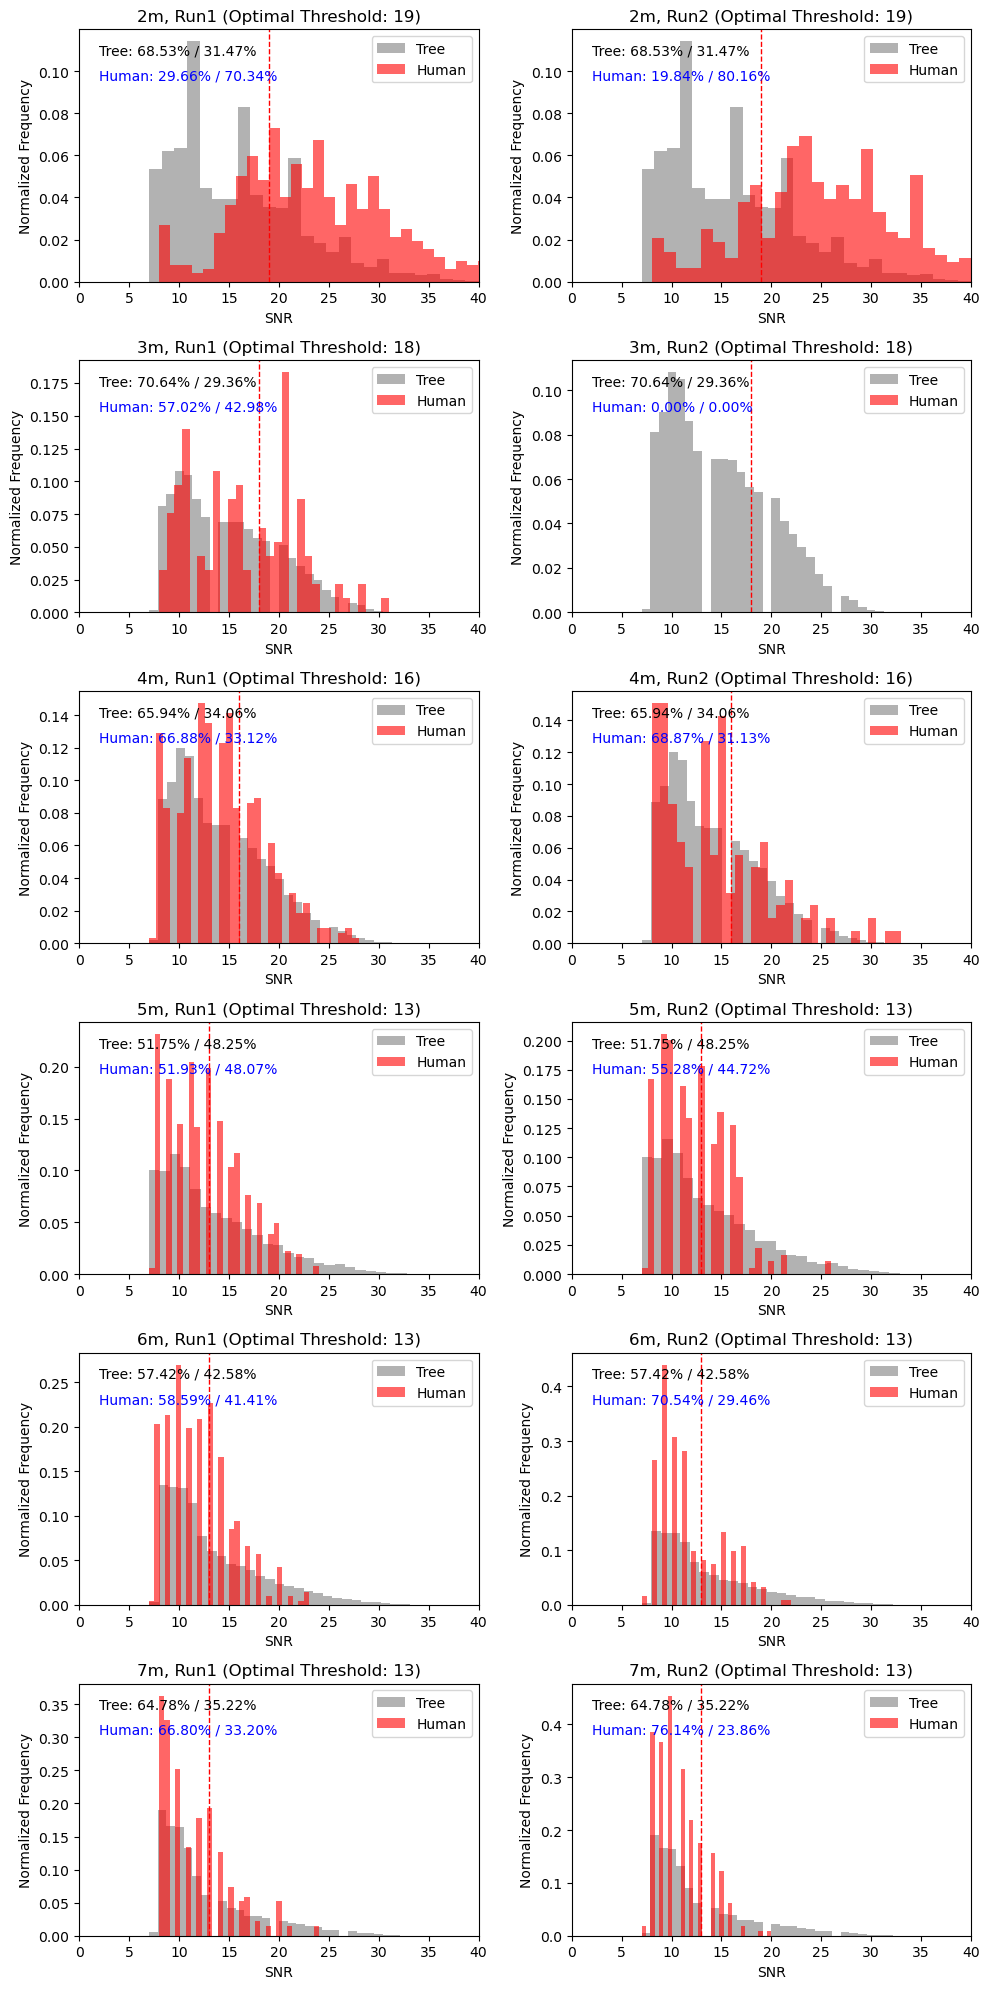

In [2]:
import pandas as pd
import re
import os
import matplotlib.pyplot as plt

# xlsx_file_tree = "D:/OneDrive/umec/project/20230901-Tmp_Assignment/20241107-tree/nearSNR/ORIG/TREE/#116_cyclic1_UART_Tree_Run1.rec.xlsx" 
# xlsx_file_hum = "D:/OneDrive/umec/project/20230901-Tmp_Assignment/20241107-tree/nearSNR/ORIG/FOV/#FR180_LX3_FOV_2m_14dB_Run1.rec.xlsx" 

xlsx_file_hum = "D:/u10962/新增資料夾 (4)/CYCLIC/20241205_S6Qi_TK1_50度來回 FOV/50度來回/#RR040_TK1_50度_U.0224112002_ACC2_Chirp38_200ms_CFAR8_2nd Table_L_2m_Run1.rec.xlsx"
xlsx_file_tree = "D:/u10962/新增資料夾 (4)/CYCLIC/20241120_S6Qi Tree test/tree/都會公園/FR_#116_ACC2_chirp38_200ms_CFAR8_LX3_Horizontal_2nd Table_U.0224111202_L邊_2m_50度_Tree_Run1.rec.xlsx"

fig, axes = plt.subplots(6, 2, figsize=(10, 20))  
axes = axes.flatten() 

threshold_range = range(10, 25)

def find_optimal_threshold(SNR_tree, SNR_hum):
    max_sum = 0
    optimal_threshold = 0

    for threshold in threshold_range:
        left_tree = (SNR_tree < threshold).sum()
        right_tree = (SNR_tree >= threshold).sum()
        total_tree = left_tree + right_tree
        left_tree_ratio = left_tree / total_tree if total_tree > 0 else 0
        right_tree_ratio = right_tree / total_tree if total_tree > 0 else 0

        left_hum = (SNR_hum < threshold).sum()
        right_hum = (SNR_hum >= threshold).sum()
        total_hum = left_hum + right_hum
        left_hum_ratio = left_hum / total_hum if total_hum > 0 else 0
        right_hum_ratio = right_hum / total_hum if total_hum > 0 else 0
        
        current_sum = left_tree_ratio + right_hum_ratio
        if ((right_hum_ratio > 0.01) & (current_sum > max_sum)):
            max_sum = current_sum
            optimal_threshold = threshold
    return optimal_threshold

plot_idx = 0
optimal_threshold_list = [0, 0, 19, 18, 16, 13, 13, 13]
for i in range(2, 8):
    # print("zz : ", re.findall(r'_(\d)+m_', os.path.basename(xlsx_file_tree))[0])
    INDEX = re.findall(r'_(\d)+m_', os.path.basename(xlsx_file_tree))[0]
    df_tree = pd.read_excel(xlsx_file_tree.replace(f"{INDEX}m", f"{i}m"), sheet_name='CloudPoint')
    SNR_tree = df_tree['@_SNR']
    
    for j in range(1, 3):  
        df_hum = pd.read_excel(xlsx_file_hum.replace("2m", f"{i}m").replace("Run1", f"Run{j}"), sheet_name='CloudPoint')
        # SNR_hum = df_hum[(df_hum['@_Range'] < 7) & (df_hum['@_Y'] > 0.8) & (df_hum['@_SNR'] >= 10)]['@_SNR']
        SNR_hum = df_hum[df_hum['@_tID'] < 10]['@_SNR']

        # optimal_threshold = find_optimal_threshold(SNR_tree, SNR_hum)
        optimal_threshold = optimal_threshold_list[i]

        ax = axes[plot_idx] 
        ax.hist(SNR_tree, bins=30, color='black', alpha=0.3, density=True, label='Tree')
        ax.hist(SNR_hum, bins=30, color='red', alpha=0.6, density=True, label='Human')
        ax.axvline(optimal_threshold, color='red', linestyle='--', linewidth=1)

        left_tree = (SNR_tree < optimal_threshold).sum()
        right_tree = (SNR_tree >= optimal_threshold).sum()
        total_tree = left_tree + right_tree
        left_tree_ratio = left_tree / total_tree if total_tree > 0 else 0
        right_tree_ratio = right_tree / total_tree if total_tree > 0 else 0

        left_hum = (SNR_hum < optimal_threshold).sum()
        right_hum = (SNR_hum >= optimal_threshold).sum()        
        total_hum = left_hum + right_hum
        left_hum_ratio = left_hum / total_hum if total_hum > 0 else 0
        right_hum_ratio = right_hum / total_hum if total_hum > 0 else 0

        name = f"{i}m, Run{j} (Optimal Threshold: {optimal_threshold})"
        ax.set_title(name)
        ax.set_xlabel('SNR')
        ax.set_ylabel('Normalized Frequency')
        ax.set_xlim(0, 40)

        ax.text(0.05, 0.9, f'Tree: {left_tree_ratio:.2%} / {right_tree_ratio:.2%}', transform=ax.transAxes, color='black')
        ax.text(0.05, 0.8, f'Human: {left_hum_ratio:.2%} / {right_hum_ratio:.2%}', transform=ax.transAxes, color='blue')

        ax.legend()
        plot_idx += 1  

plt.tight_layout()
plt.show()
